In [108]:
from sklearn.model_selection import train_test_split
from pyspark.ml.classification import LogisticRegression ,RandomForestClassifier ,LinearSVC
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark import SparkConf
import seaborn as sns

In [109]:
new_df=pd.read_csv('D:/Fourth_Year/Second_Term/BD/KickStarter-Success-Prediction/output.csv')

In [110]:
states=new_df["state"].value_counts() / len(new_df["state"])

failed        0.597125
successful    0.402875
Name: state, dtype: float64


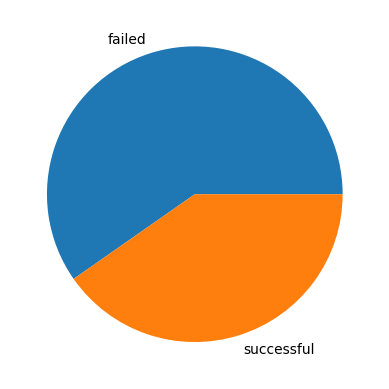

In [111]:
print(states)
plt.pie(list(states.values) , labels = list(states.index))
plt.show()

Text(0.5, 0, 'Number of campaigns')

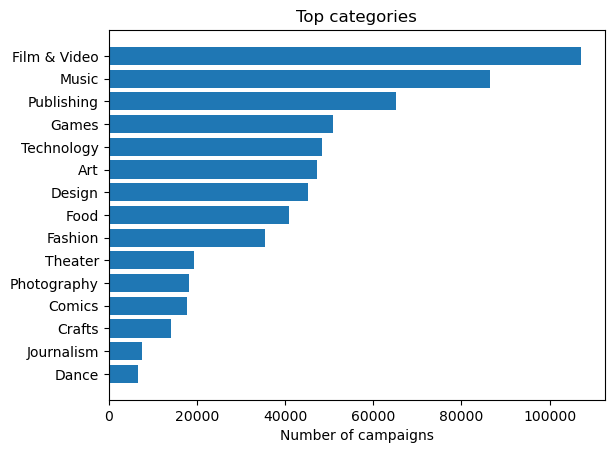

In [112]:

x = new_df.main_category.value_counts().index.tolist()
y = new_df.main_category.value_counts()
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Top categories')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

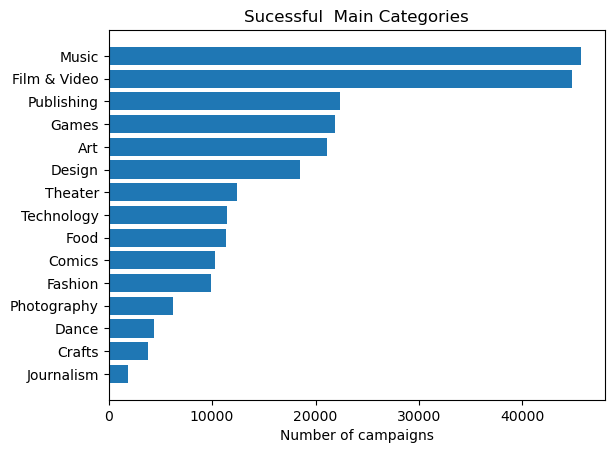

In [113]:
values = new_df.loc[new_df.state=='successful','main_category'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Sucessful  Main Categories')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

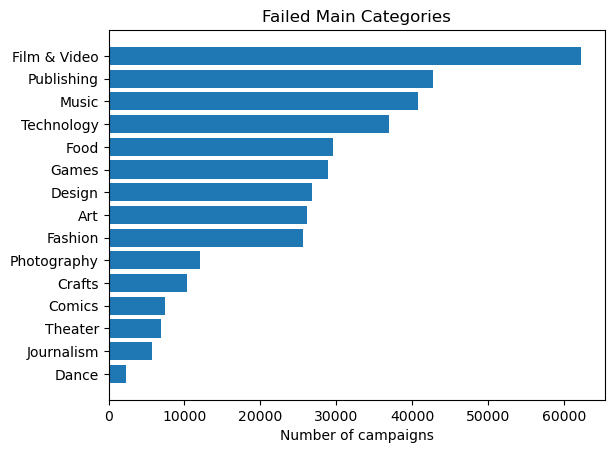

In [114]:
values = new_df.loc[new_df.state=='failed','main_category'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Failed Main Categories')
plt.xlabel('Number of campaigns')

Text(0.5, 1.0, 'Average USD Pledged Among Failed Campaigns')

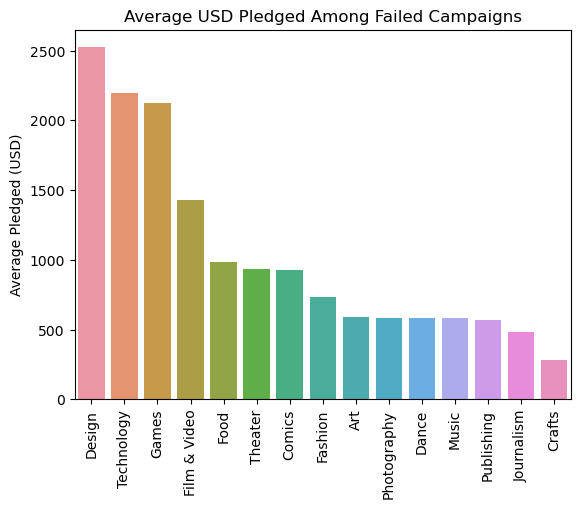

In [115]:
successful = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['usd pledged']).reset_index()
mean_ord=mean.sort_values(by="usd pledged",ascending=False)

x=mean.main_category
y=mean['usd pledged']
figz=sns.barplot(x="main_category", y="usd pledged" , data=mean_ord)
figz.set(xlabel='', ylabel='Average Pledged (USD)')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average USD Pledged Among Failed Campaigns')


Text(0.5, 1.0, 'Average USD Pledged Among Successful Campaigns')

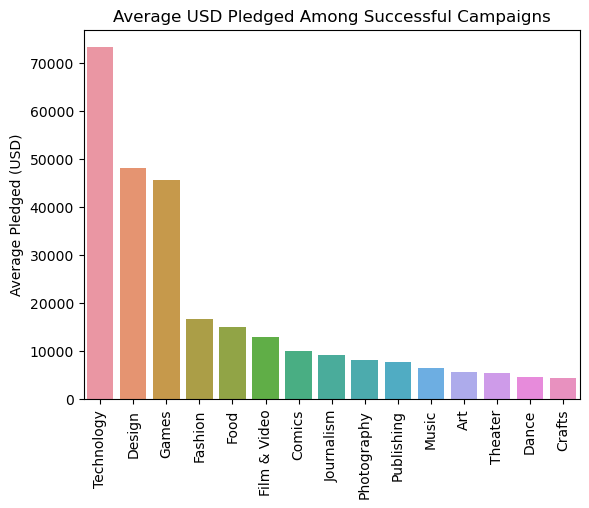

In [116]:


successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['usd pledged']).reset_index()
mean_ord=mean.sort_values(by="usd pledged",ascending=False)

x=mean.main_category
y=mean['usd pledged']
figz=sns.barplot(x="main_category", y="usd pledged" , data=mean_ord)
figz.set(xlabel='', ylabel='Average Pledged (USD)')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average USD Pledged Among Successful Campaigns')



Text(0.5, 1.0, 'Average goal Among Failed Campaigns')

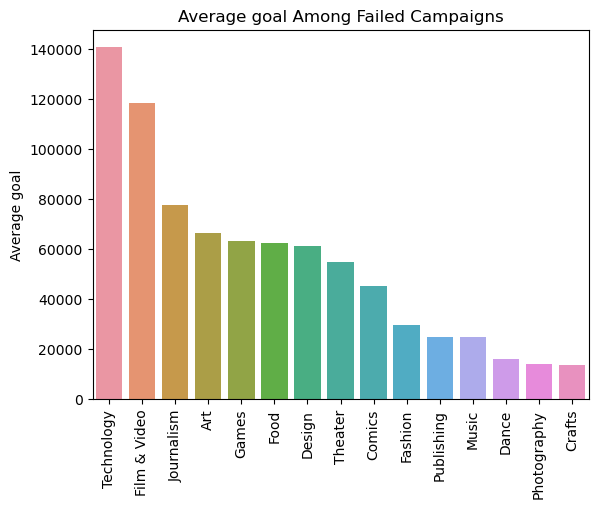

In [117]:
failed = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = failed.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['goal']).reset_index()
mean_ord=mean.sort_values(by="goal",ascending=False)

x=mean.main_category
y=mean['goal']
figz=sns.barplot(x="main_category", y="goal" , data=mean_ord)
figz.set(xlabel='', ylabel='Average goal')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average goal Among Failed Campaigns')

Text(0.5, 1.0, 'Average goal Among successful Campaigns')

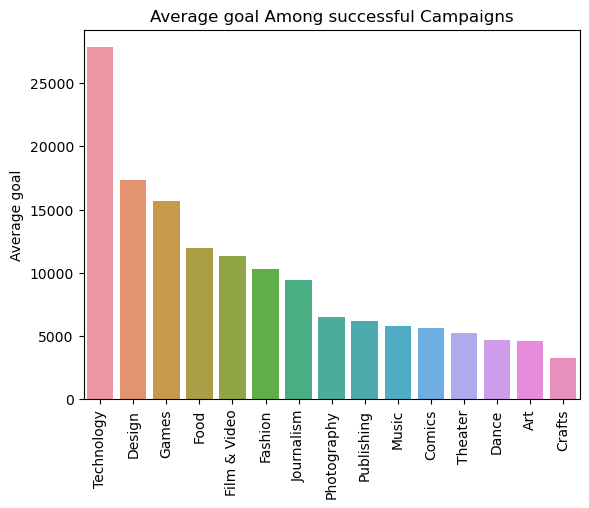

In [118]:
successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['goal']).reset_index()
mean_ord=mean.sort_values(by="goal",ascending=False)

x=mean.main_category
y=mean['goal']
figz=sns.barplot(x="main_category", y="goal" , data=mean_ord)
figz.set(xlabel='', ylabel='Average goal')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average goal Among successful Campaigns')

Text(0.5, 1.0, 'Count backers Among successful Campaigns')

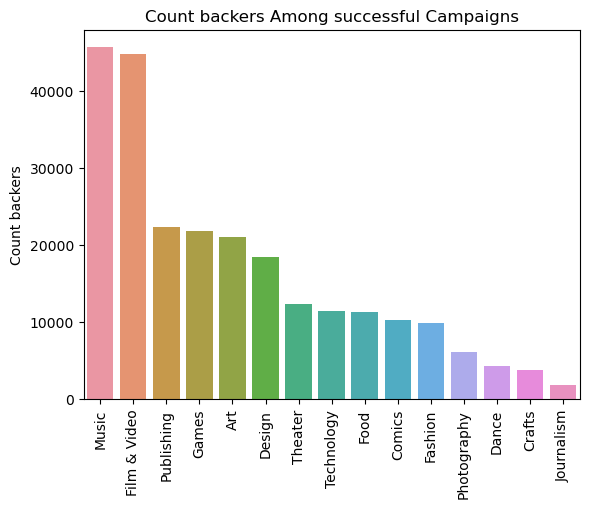

In [119]:
successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).count()
count_value= pd.DataFrame(groupby_main_category['backers']).reset_index()
count_ord=count_value.sort_values(by="backers",ascending=False)

x=count_value.main_category
y=count_value['backers']
figz=sns.barplot(x="main_category", y="backers" , data=count_ord)
figz.set(xlabel='', ylabel='Count backers')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Count backers Among successful Campaigns')

Text(0.5, 1.0, 'Count backers Among Failed Campaigns')

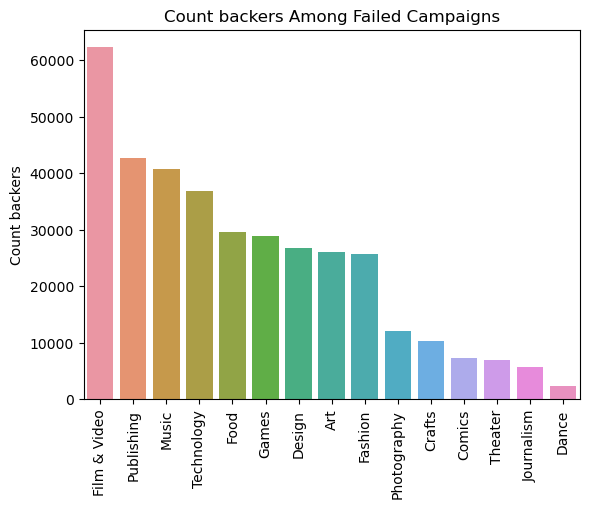

In [120]:
failed = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = failed.groupby(['main_category']).count()
count_value= pd.DataFrame(groupby_main_category['backers']).reset_index()
count_ord=count_value.sort_values(by="backers",ascending=False)

x=count_value.main_category
y=count_value['backers']
figz=sns.barplot(x="main_category", y="backers" , data=count_ord)

figz.set(xlabel='', ylabel='Count backers')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Count backers Among Failed Campaigns')

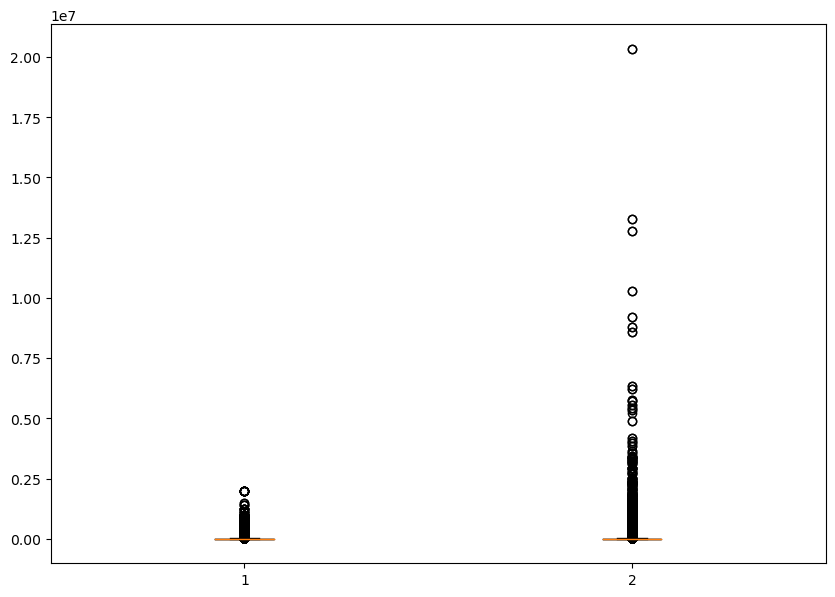

In [121]:
fig = plt.figure(figsize =(10, 7))
data_values =new_df.loc[(new_df.state == 'successful')]
data = [data_values['goal'], data_values['usd pledged']]
plt.boxplot(data)
plt.show()

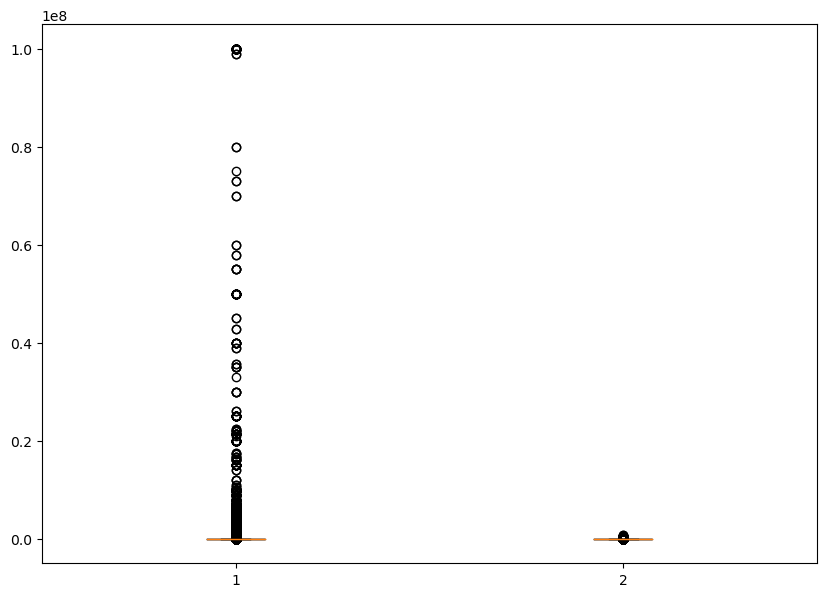

In [122]:
fig = plt.figure(figsize =(10, 7))
data_values =new_df.loc[(new_df.state == 'failed')]
data = [data_values['goal'], data_values['usd pledged']]
plt.boxplot(data)
plt.show()